<a href="https://colab.research.google.com/github/Pushkar0655g/Generative-AI/blob/main/A9_1_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0793 - loss: 2.3145 - val_accuracy: 0.0896 - val_loss: 2.3025
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0946 - loss: 2.2988 - val_accuracy: 0.1078 - val_loss: 2.2886
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1078 - loss: 2.2863 - val_accuracy: 0.1239 - val_loss: 2.2751
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1246 - loss: 2.2728 - val_accuracy: 0.1407 - val_loss: 2.2619
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1409 - loss: 2.2604 - val_accuracy: 0.1567 - val_loss: 2.2489
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1575 - loss: 2.2481 - val_accuracy: 0.1747 - val_loss: 2.2357
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1771 - loss: 2.2349 - val_accuracy: 0.1925 - val_loss: 2.2223
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1954 - loss: 2.2232 - val_accuracy: 0.


Training Accuracy: 24.44%
Testing Accuracy: 24.70%

Model saved as 'mnist_ann_model.h5'


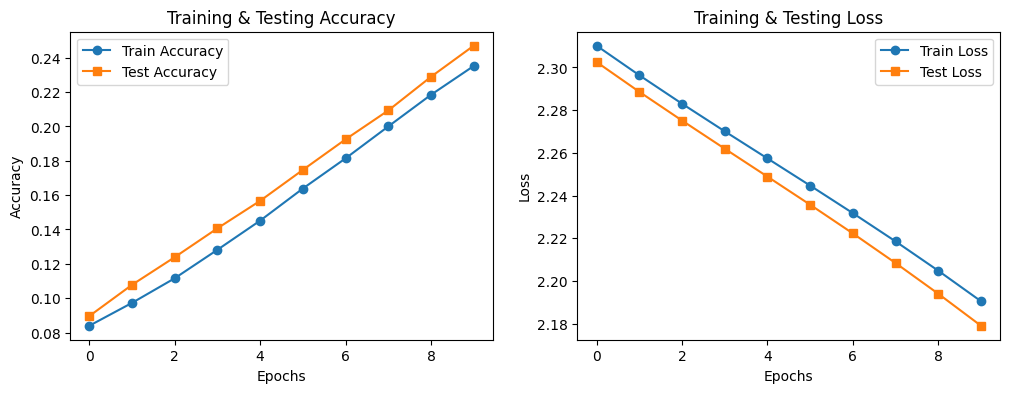

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2376 - loss: 2.1962

Loaded Model Test Accuracy: 24.70%


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(784,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\nTraining Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")
model.save("mnist_ann_model.h5")
print("\nModel saved as 'mnist_ann_model.h5'")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Testing Loss')

plt.show()
loaded_model = keras.models.load_model("mnist_ann_model.h5")
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f"\nLoaded Model Test Accuracy: {test_acc * 100:.2f}%")
